# Finch beaks and the need for statistics
<p>Every year since 1973, Peter and Rosemary Grant of Princeton University have been spending several months of the year on the tiny vocanic cinder cone island of Daphne Major in the Galapagos. This island has two ground finch species, Geospiza fortis and Geospiza scandens. </p>

<p> <img style="float: left" src ="files/img/fortis.png"> </p>
<p> <img src ="files/img/scandens.png"> </p>
    
<p> The Grants have monitored them every year, tagging them, making physiological measurements, taking samples for genetic sequencing, and more. They generously placed all of their data on the Dryad data repository making it free for anyone to use. The data set is impressive and a great set for using data science and statistical inference to learn about evolution. We will work with Grant's measurements of the beak length and beak depth. </p>
    
<p> <img style="float: left" src ="files/img/beak_length.png" width="300" height="300"> </p>
<p> <img src ="files/img/beak_depth.png" width="360" height="360"> </p>
        
<p> We will condider different aspects of the beak geometry, including how it varies over time, from species to species, and from parents to offsprings.</p>
    

## 1. EDA of beak depths of finches

<p> We will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.<p>

<p>We will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.<p>

In [7]:
# import pankage needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# read data in 
df = pd.read_csv('datasets/beak_depth_scandens.csv')

# print the head of df
df.head()

,beak_depth,beak_length,year
0,8.4,13.9,1975
1,8.8,14.0,1975
2,8.4,12.9,1975
3,8.0,13.5,1975
4,7.9,12.9,1975


Create a beeswarm plot showing the beak depth in 1975 and 2012

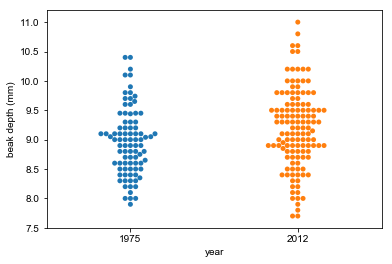

In [33]:
# Creat bee swarm plot
_ = sns.swarmplot('year', 'beak_depth', data=df)

# label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')


It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

## 2. ECDF of beak depths
While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

Define a function to compute ECDF for one dimensional array

In [9]:
# Define a function to compute ECDF for a one-dimensional array
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    
    # Number of data points
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

Filter df and convert beak_depth of year 1975 and 2012 to numpy arrays

In [21]:
bd_1975 = np.array(df.beak_depth[df.year == 1975])

bd_2012 = np.array(df.beak_depth[df.year == 2012])

Compute and plot ECDF

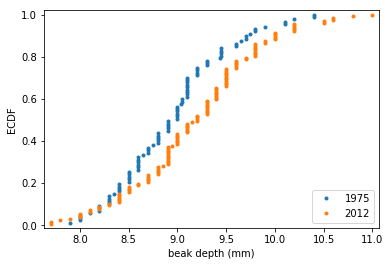

In [11]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis label and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

## 3. Parameter estimate of beak depths
Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

### 3.1 Define function to generate bootstrap replicate of 1D data

In [13]:
# Generate bootstrap replicate of 1D data
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

### 3.2 Define function generate multiple bootstrap replicates from the data set

In [14]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

### 3.3 Compute 95% confidence interval of the bootstrap replicates difference of means

In [15]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of real sample means =', mean_diff, 'mm')
print('95% confidence interval of bootsrrap replicates difference of means =', conf_int, 'mm')

difference of real sample means = 0.22622047244094645 mm
95% confidence interval of bootsrrap replicates difference of means = [0.05892259 0.38831136] mm


## 4. Hypothesis test: Are beaks deeper in 2012?

<p>Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?<p>

<p>Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.<p>

In [18]:
# Compute the mean of the combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the sample
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p-value = ', p)

p-value =  0.0036


We get a p-value of 0.0036, which suggests that there is a statistically significant difference. This suggests beaks depth did get deeper in 2012 than in 1975. 

## 5. How the beak length and depth change together?

<p>We just determined that the beak depth of Geospiza scandens changed over the course of 37 years. There are a few hypothesis as to why this is the case. One reason may be a drought in 1976 and 1977 that resulted in the death of the plants that produce small seeds on the island. The larger seeds required deeper beaks to crack them, so large-beaked birds survived and then reproduced. If this is the case, it stands to reason that the length of the beak might also change over time. Importantly, if the length and the depth change at the same rate, the beak has the same shape; it just gets bigger. But if the beak length and beak depth change differently, the shape of the beak changes. We will investigate how beak length and depth change together. 

### 5.1 EDA of beak length and depth

Convert beak length of year 1975 and 2012 into numpy arrays

In [22]:
bl_1975 = np.array(df.beak_length[df.year == 1975])

bl_2012 = np.array(df.beak_length[df.year == 2012])

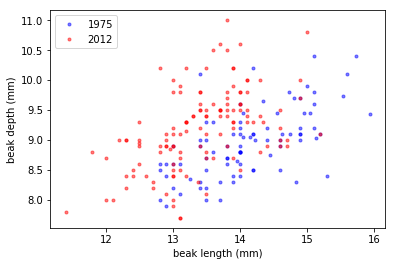

In [25]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
            linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='none', color='red', alpha=0.5)

# label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

## 6. Linear regression and bootstrap estimate for the regression parameters
Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

### 6.1 Define a function to do pairs bootstrap
Pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, we will write a function to perform pairs bootstrap on a set of x,y data.

In [28]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression"""
    
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
        
    return bs_slope_reps, bs_intercept_reps

### 6.2 Linear regression and bootsrap for liear regression

In [29]:
# Compute the linear regression for the real data
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for linear regression
bs_slope_reps_1975, bs_intercept_reps_1975 = \
draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

# Compute confidence intervals of intercepts
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
     'confidence interval =', slope_conf_int_1975)
print('2012: slope =', slope_2012,
     'confidence interval =', slope_conf_int_2012)
print('1975: intercept =', intercept_1975,
     'confidence interval =', intercept_conf_int_1975)
print('2012 intercept =', intercept_2012,
     'confidence interval =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 confidence interval = [0.33278931 0.58582322]
2012: slope = 0.462630358835313 confidence interval = [0.33195196 0.6085437 ]
1975: intercept = 2.390875236584226 confidence interval = [0.68258587 4.26872879]
2012 intercept = 2.977247498236019 confidence interval = [1.03422987 4.69848471]


It looks they have the same slope but different intercepts.

## 7. Displaying the linear regression results


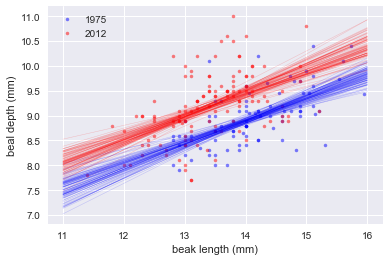

In [38]:
# seaborn style
sns.set()

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
            linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beal depth (mm)')
_ = plt.legend(('1975', '2012'), loc = 'upper left')

# Generate x-values for bootstrap lines: x
x = np.array([11, 16])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i], linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i], linewidth=0.5, alpha=0.2, color='red')



## 8. Beak length to depth ratio
The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [40]:
# Compute length-to-depth ratios
ratio_1975 = np.array(bl_1975 / bd_1975)
ratio_2012 = np.array(bl_2012 / bd_2012)

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
     'confidence interval =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
     'confidence interval =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 confidence interval = [1.55707429 1.60056045]
2012: mean ratio = 1.4658342276847767 confidence interval = [1.44352738 1.48855839]


We have showed that the mean beak length to depth ratio was 1.58 in 1975 and 1.47 in 2012. The low end of the 1975 99% confidence interval was 1.56 mm and the high end of the 99% confidence interval in 2012 was 1.49 mm. The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

## 9. Calculate of heritability

<p> What is causing the beaks of Geospiza scandens to get bigger over time? The selective pressure brought on by the drought. Why do some birds have such large beaks to begin with? A prevailing explanation is that the scandens birds are mating the other finch species Geospiza fortis. These hybrid birds then mate with pure scandens which is called introgressive hybridization, which can bring fortis characteristics into the scandens species. In order to assess the viability of this explanation, we need to know how strongly parental traits are passed on to offspring. We will investigate the extent to which parental beak depth is inherited by offspring in both scandens and fortis. 

### EDA of Heritability

In [79]:
# import data
df = pd.read_csv('datasets/heritability.csv')

df.head()

,bd_parent_scandens,bd_offspring_scandens,bd_parent_fortis,bd_offspring_fortis
0,8.3318,8.4190,10.100,10.70
1,8.4035,9.2468,9.550,9.78
2,8.5317,8.1532,9.400,9.48
3,8.7202,8.0089,10.250,9.60
4,8.7089,8.2215,10.125,10.27


In [81]:
# The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens
bd_parent_scandens = np.array(df.bd_parent_scandens.dropna())
# The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents
bd_offspring_scandens = np.array(df.bd_offspring_scandens.dropna())

# The bd_parent_fortis contains the measurements of G.fortis parents
bd_parent_fortis = np.array(df.bd_parent_fortis)
# The bd_offspring_fortis contains the measurements of G.fortis offspring
bd_offspring_fortis = np.array(df.bd_offspring_fortis)


Scatter plot

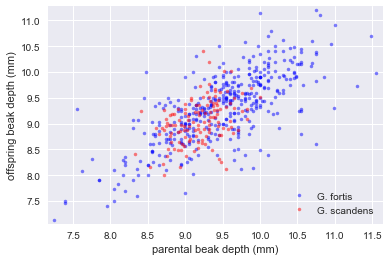

In [82]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis, marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens, marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc = 'lower right')

It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

## 10. Correlation of offspring and parental data
In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

### We modify the function to do pairs bootstrap to get estimates for parameters derived from linear regression, to get a new function that performs pairs bootstrap and computes a single statistic on the pairs sample.

In [86]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for linear regression"""
    
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    # Initialize replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)
        
    return bs_replicates

## 11. Pearson correlation of offspring and parental data
The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function we wrote to compute a 95% confidence interval using pairs bootstrap.

### Define a function to compute Pearson correlation coefficient between two arrays

In [84]:
def pearson_r(x:'array', y:'array'):
    """Compute Pearson correlation coefficient between two arrays"""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # return entry [0,1]
    return corr_mat[0,1]

In [87]:
# Compute the Pearson correlation coefficients of real data
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.41170636294012586 [0.26603345 0.56014303]
G. fortis: 0.7283412395518484 [0.67153295 0.78074936]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

## 12. Measuring heritability
Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. 


Write a function heritability(parents, offspring) that computes heritability defined as the ratio of the covariance of the trait in parents and offspring divided by the variance of the trait in the parents. 

In [89]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples"""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

In [90]:
# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis =  draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens', heritability_scandens, conf_int_scandens)
print('G. fortis', heritability_fortis, conf_int_fortis)

G. scandens 0.5485340868685983 [0.35485237 0.76733648]
G. fortis 0.7229051911438155 [0.64275737 0.79258215]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

## 13. Is beak depth heritable at all in 'G. scandens'?
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. We will test that hypothesis here. To do this, we will do a pairs permutation test.

In [92]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)
    
# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-value', p)

p-value 0.0


We get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. 

We can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability we might expect by chance.

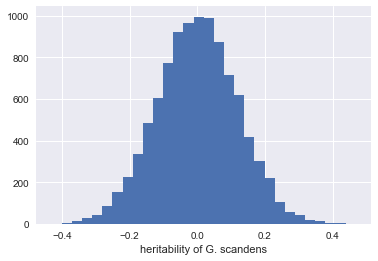

In [95]:
_ = plt.hist(perm_replicates, bins=30)
_ = plt.xlabel('heritability of G. scandens')